<a href="https://colab.research.google.com/github/man-moon/2022S-ML/blob/main/HW3_201820744_%EA%B9%80%EB%AC%B8%EB%A7%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HW3 :: Parameter Tuning and Classifcation**

## 코랩과 구글 드라이브 연동 OR 로컬에서 파일 업로드
- 해당 섹션 코드 수정 가능

In [ ]:
# 연동 OR 파일 업로드
# 연동 시 path 설정 주의

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

## 데이터 불러오기

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
path = 'heart_clean.csv' # 제공된 csv 파일 사용
df = pd.read_csv(path)

In [ ]:
df.head()

,Age,RestingBP,FastingBS,ExerciseAngina,Oldpeak,HeartDisease
0,53,120,0,0,0.0,0
1,65,134,0,1,1.1,1
2,60,160,0,1,0.5,1
3,57,150,1,0,0.2,0
4,57,150,0,1,0.6,1


## 데이터 나누기

### **주의 사항**
train_test_split에 random seed를 사용하여 split set을 고정한다.
- 모든 문제에 같은 random seed를 부여할 필요는 없다.


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 123)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state = 123)

print("X_train's shape : ", X_train.shape)
print("y_train's shape : ", y_train.shape)
print("\nX_val's shape : ", X_val.shape)
print("y_val's shape : ", y_val.shape)
print("\nX_test's shape : ", X_test.shape)
print("y_test's shape : ", y_test.shape)

X_train's shape :  (479, 5)
y_train's shape :  (479,)

X_val's shape :  (160, 5)
y_val's shape :  (160,)

X_test's shape :  (71, 5)
y_test's shape :  (71,)




---



## 문제1 KNN



- Scikit-learn 라이브러리를 이용하여 KNN의 최적의 파라미터를 찾는다.
    - 최근접 이웃을 찾기 위한 거리의 종류로 최소한 두 가지 이상의 거리 척도를 사용한다.
    - K값을 최소 3개 이상 비교한다.
    - 거리 척도, k값에 따라 train, validation 정확도를 한 그래프로 그린다.(x축 k값, y축 정확도)
    - 찾은 최적의 파라미터와 test set 이용하여 test_accuracy 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.



최적의 K: 
3
최적의 거리 척도: 
1
test accuracy: 
0.6197183098591549


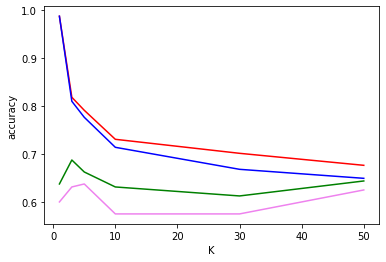

In [ ]:
### 문제 1 ###
## 코드 작성 ##
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

K = [1, 3, 5, 10, 30, 50]
train_acc = []
val_acc = []
train_acc2 = []
val_acc2 = []

max = 0
optimal_idx = 1
optimal_method = 0

#Manhattan distance
for i in K:
    #KNN 모델 학습
    classifier = KNeighborsClassifier(n_neighbors=i,p=1,metric='minkowski')
    classifier.fit(X_train, y_train)
    
    #validation 데이터로 예측한 결과를 저장
    result1 = classifier.predict(X_val) 
    val_acc.append(accuracy_score(y_val, result1))
    
    #적의 k와 최적의 거리 척도를 저장
    if max < accuracy_score(y_val, result1):
        max = accuracy_score(y_val, result1)
        optimal_idx = i
        optimal_method = 1
    
    result2 = classifier.predict(X_train)
    train_acc.append(accuracy_score(y_train, result2))

    
#Euclidean distance
for i in K:
    #KNN 모델 학습
    classifier = KNeighborsClassifier(n_neighbors=i,p=2,metric='minkowski')
    classifier.fit(X_train, y_train)
    
    #validation 데이터로 예측한 결과를 저장
    result1 = classifier.predict(X_val)
    val_acc2.append(accuracy_score(y_val, result1))
    
    #최적의 k와 최적의 거리 척도를 저장
    if max < accuracy_score(y_val, result1):
        max = accuracy_score(y_val, result1)
        optimal_idx = i
        optimal_method = 2
    
    result2 = classifier.predict(X_train)
    train_acc2.append(accuracy_score(y_train, result2))
    
plt.figure()
plt.plot(K, train_acc, label='train accuracy', color = 'r')
plt.plot(K, val_acc, label='validation accuracy', color = 'g')
plt.plot(K, train_acc2, label='train accuracy', color = 'b')
plt.plot(K, val_acc2, label='validation accuracy', color = 'violet')
plt.xlabel('K')
plt.ylabel('accuracy')

print("최적의 K: ")
print(optimal_idx)
print("최적의 거리 척도: ")
print(optimal_method)



test_acc = []

#위에서 구한 최적의 K와 최적의 거리척도를 이용하여 테스트
final_classifier = KNeighborsClassifier(n_neighbors=optimal_idx,p=optimal_method, metric='minkowski')
final_classifier.fit(X_train, y_train)

result = classifier.predict(X_test)
test_acc.append(accuracy_score(y_test, result))

print("test accuracy: ")
print(accuracy_score(y_test, result))

**설명 작성**
- 최적의 파라미터: K=3, 거리척도=Manhattan distance
- 설명: Manhattan distance와 Euclidean distance로 나누어서 모델링을 진행하였습니다.
        위의 그래프에서 초록색이 Manhattan distance로 모델링 한 결과이고, 
        바이올렛색이 Euclidean distance로 모델링 한 결과입니다.
        따라서 Manhattan distance가 최적인 것을 알 수 있고, K=3인 부분에서 가장 높은 accuracy를 가집니다.

## 문제2 SVM


- Scikit-learn 라이브러리를 이용하여 SVM의 최적의 파라미터를 찾는다.
    - Kernel trick 중 최소 두개를 비교한다.
    - 최적의 파라미터 C값을 찾는다.
    - 파라미터에 따라 train, validation 정확도를 한 그래프로 그린다.(x축 C값, y축 정확도)
    - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.


최적의 C: 
10
최적의 kernel: 
poly
test accuracy: 
0.676056338028169


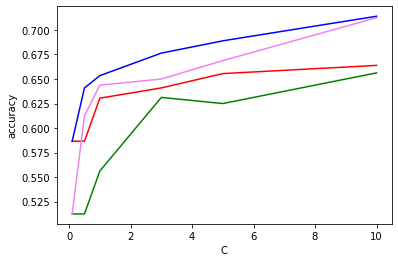

In [ ]:
### 문제 2 ###
## 코드 작성 ##
from sklearn import svm

C = [0.1, 0.5, 1, 3, 5, 10]

max=0
kernel_list = ["rbf", "poly"]
optimal_c = 0.1
optimal_kernel = 0

train_acc1 = []
val_acc1 = []
train_acc2 = []
val_acc2 = []

#linear kernel
for i in C:
    #svm 모델링
    classifier = svm.SVC(kernel='rbf', C = i)
    classifier.fit(X_train, y_train)
    
    result1 = classifier.predict(X_train)
    train_acc1.append(accuracy_score(y_train, result1))
    
    #validation 데이터로 예측한 결과를 저장
    result2 = classifier.predict(X_val)
    val_acc1.append(accuracy_score(y_val, result2))
    if max < accuracy_score(y_val, result2):
        max = accuracy_score(y_val, result2)
        optimal_c = i
        optimal_kernel = 0





#polynominal kernel
for i in C:
    #svm모델링
    classifier = svm.SVC(kernel='poly', C = i)
    classifier.fit(X_train, y_train)
    
    result1 = classifier.predict(X_train)
    train_acc2.append(accuracy_score(y_train, result1))
    
    #validation 데이터로 예측한 결과를 저장
    result2 = classifier.predict(X_val) 
    val_acc2.append(accuracy_score(y_val, result2))
    if max < accuracy_score(y_val, result2):
        max = accuracy_score(y_val, result2)
        optimal_c = i
        optimal_kernel = 1

print("최적의 C: ")
print(optimal_c)
print("최적의 kernel: ")
print(kernel_list[optimal_kernel])


plt.figure()
plt.plot(C, train_acc1, label='train accuracy', color = 'r')
plt.plot(C, val_acc1, label='validation accuracy', color = 'g')
plt.plot(C, train_acc2, label='train accuracy', color = 'b')
plt.plot(C, val_acc2, label='validation accuracy', color = 'violet')
plt.xlabel('C')
plt.ylabel('accuracy')



#위에서 구한 최적의 C와 최적의 kernel를 이용하여 테스트
test_acc = []

final_classifier = svm.SVC(kernel=kernel_list[optimal_kernel], C = optimal_c)
final_classifier.fit(X_train, y_train)

result = classifier.predict(X_test)
test_acc.append(accuracy_score(y_test, result))

print("test accuracy: ")
print(accuracy_score(y_test, result))

**설명 작성**  
- 최적의 파라미터: C=10, kernel=poly
- 설명: 위의 그래프를 보면 violet 색이 poly kernel로 모델링 했을 때고, 초록 색이 linear kernel로 모델링 했을 때다.
        poly kernel을 이용했을 때가 accuracy가 더 높은 것을 알 수 있고, 가장 accuracy가 높은 최적의 C는 10이다.



---



## 문제3 Cross validation with Random Forest
### 3-1: k-fold
- 수업시간에 배운 **5-fold** 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 random forest 모델의 파라미터를 cross-validation을 바탕으로 최적화한다.
    - **5-fold CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
    - 파라미터에 따라 K-fold CV를 통해 나온 평균 정확도와 각 fold의 정확도들을 한 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
    - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

### 3-2: Leave One Out
- 수업시간에 배운 Leave-One-Out 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 random forest 모델의 파라미터를 cross-validation을 바탕으로 최적화한다.
  - **Leave-One-Out CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
  - 파라미터에 따라 Leave-One-Out CV를 통해 나온 평균 정확도를 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
  - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
  - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

최적의 n_estimators 값:
50
test accuracy: 
0.676056338028169


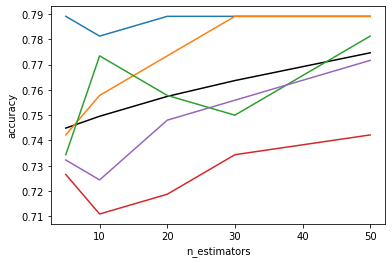

In [ ]:
### 문제 3-1 ###
## 코드 작성 ##
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

X_train2 = pd.concat([X_train, X_val])
y_train2 = pd.concat([y_train, y_val])

#n_estimators 파라미터 배열
E = [5, 10, 20, 30, 50]

cv = KFold(n_splits=5)

val_mean_acc = []
val_acc = [[],[],[],[],[]]
optimal_param = 5;
max_acc = 0;

loop_param = 0


for i in E:
    #randomForest 모델링
    classifier = RandomForestClassifier(n_estimators=i, random_state = 123)
    val_sum = 0
    
    #5-fold CV
    for train_idx,val_idx in cv.split(X_train2):
        
        X_train, X_val = X_train2.iloc[train_idx], X_train2.iloc[val_idx]
        y_train, y_val = y_train2.iloc[train_idx], y_train2.iloc[val_idx]
    
        classifier.fit(X_train, y_train)

        result = classifier.predict(X_val)
        val_sum += accuracy_score(y_val, result)
        
        val_acc[loop_param].append(accuracy_score(y_val, result))
        
    #n_estimators 파라미터가 i일 때, 평균값
    mean = val_sum/5
    
    #n_estimators 파라미터가 i일때, accuracy가 더 높다면 갱신
    if(max_acc < mean):
        max_acc = mean
        optimal_param = i
        
    val_mean_acc.append(mean)
    loop_param += 1

        

    
plt.figure()
plt.plot(E, val_mean_acc, label='val accuracy', color = 'black') #검정색이 평균 정확도
plt.plot(E, val_acc, label='val accuracy')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')



classifier = RandomForestClassifier(n_estimators=optimal_param, random_state = 123)
classifier.fit(X_train, y_train)
result = classifier.predict(X_test)

print("최적의 n_estimators 값:")
print(optimal_param)

print("test accuracy: ")
print(accuracy_score(y_test, result))

**설명 작성**  
- test accuracy: 0.676056338028169
- 최적의 파라미터: n_estimators=50
- 설명: 위의 그래프를 보면 검정색이 파라미터 값별로 accuracy 평균을 나타낸다. n_estimators가 50일 때, 가장 accuracy가 높으므로 
        최적의 파라미터를 50으로 정했다.
        n_estimators는 decision tree의 개수이다. 통상적으로 decision tree의 개수가 많아질수록 성능이 좋아지지만 시간은 더 오래걸린다.



최적의 n_estimators 값:
50
test accuracy: 
0.6619718309859155


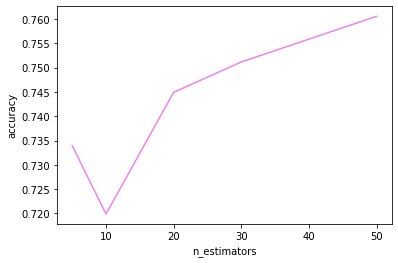

In [ ]:
## 문제 3-2 ###
# 코드 작성 ##
from sklearn.model_selection import LeaveOneOut

X_train2 = pd.concat([X_train, X_val])
y_train2 = pd.concat([y_train, y_val])

#n_estimators 파라미터 배열
E = [5, 10, 20, 30, 50]

cv = LeaveOneOut()

val_mean_acc = []
optimal_param = 5;
max_acc = 0;

loop_param = 0

for i in E:
    #randomForest 모델링
    classifier = RandomForestClassifier(n_estimators=i, random_state = 123)
    val_sum = 0
    #Leave one out
    for train_idx,val_idx in cv.split(X_train2):
        
        X_train, X_val = X_train2.iloc[train_idx], X_train2.iloc[val_idx]
        y_train, y_val = y_train2.iloc[train_idx], y_train2.iloc[val_idx]
    
        classifier.fit(X_train, y_train)

        result = classifier.predict(X_val)
        val_sum += accuracy_score(y_val, result)
        
    #n_estimators 파라미터가 i일 때, 평균값
    mean = val_sum/len(X_train2)
    
    #n_estimators 파라미터가 i일때, accuracy가 더 높다면 갱신
    if(max_acc < mean):
        max_acc = mean
        optimal_param = i
        
    val_mean_acc.append(mean)
    loop_param += 1

        

    
plt.figure()
plt.plot(E, val_mean_acc, label='val accuracy', color = 'violet')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')



test_acc = []
classifier = RandomForestClassifier(n_estimators=optimal_param, random_state = 123)
classifier.fit(X_train, y_train)
result = classifier.predict(X_test)
test_acc.append(accuracy_score(y_test, result))

print("최적의 n_estimators 값:")
print(optimal_param)
print("test accuracy: ")
print(accuracy_score(y_test, result))



**설명 작성**  
- test accuracy: 0.6619718309859155
- 최적의 파라미터: n_estimators=50
- 설명: 위의 그래프는 파라미터의 값별로 accuracy 평균을 나타낸다. n_estimators가 50일 때, 가장 accuracy가 높으므로 
        최적의 파라미터를 50으로 정했다.
        n_estimators는 decision tree의 개수이다. 통상적으로 decision tree의 개수가 많아질수록 성능이 좋아지지만 시간은 더 오래걸린다.



---



## 문제4 Regression
문제 4 에서는 캘리포니아 주택 가격 데이터셋을 사용합니다.   
학습을 통해 주택 가격을 예측하는 문제입니다.  
데이터에 대한 자세한 설명은 아래 코드의 description을 참고해주세요.

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [ ]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['target'] = housing.target

In [ ]:
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [ ]:
print(df.shape) #(20640, 9)
print(df.describe())

(20640, 9)
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308  

### 문제 4-1 : Pearson Correlation
- seaborn 패키지를 사용하여 pearson correlation heatmap을 그린다.
- heatmap을 확인한 후 각 feature들 간 어떠한 관계가 있는지 아래의 텍스트 셀에 서술한다.    
- target과 연관성이 높은 feature의 column들을 아래의 텍스트 셀에 기술한다.
- 기술한 columns들과 target column을 포함하여 DataFrame을 만들고 **이후 모든 문제에서는 이 DataFrame을 사용한다**.

<AxesSubplot:>

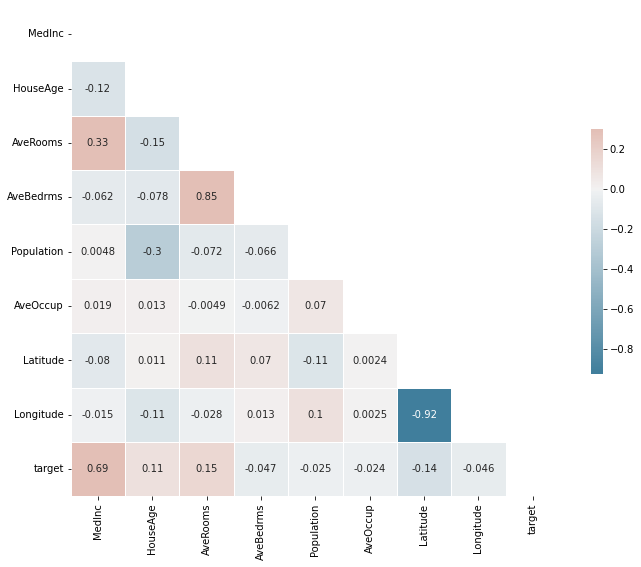

In [ ]:
### 문제 4-1 ###
# correlation map 작성 후 plot
import seaborn as sns

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))

#cmap을 만든후에 heatmap 생성
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

- **Feature들 간 관계 서술**  
  답: 상관 계수는 -1 ~ 1 사이의 값을 가지며, 1또는 -1에 가까울수록 두 Feature사이에 연관성이 크다고 할 수 있다.
  상관 계수가 양수인 경우, 한 변수의 값이 커지면 다른 변수의 값도 커지고 
  상관 관계가 음수인 경우, 한 변수의 값이 커지면 다른 변수의 값은 작아진다.
  
  어느정도의 상관관계가 있는 feature들간의 관계만 서술해보면(절댓값 0.1 이상으로 한다)
  
  음의 상관관계:
      AveRooms - HouseAge, Population - HouseAge, Longtitude - HouseAge, Latitude - Pipulation, Longtitude - Latitude
  양의 상관관계:
      AveRooms - MedInc, AveBedrms - AveRooms, Latitude - AveRooms, Longitude - Population
  

- **최종 선택한 feature들**  
  답: MedInc, HouseAge, AveRooms, Latatude

In [ ]:
### 문제 4-1 ###
# 새 dataframe 만들기 
df_final = df[['MedInc', 'HouseAge', 'AveRooms', 'Latitude', 'target']]
df_final

,MedInc,HouseAge,AveRooms,Latitude,target
0,8.3252,41.0,6.984127,37.88,4.526
1,8.3014,21.0,6.238137,37.86,3.585
2,7.2574,52.0,8.288136,37.85,3.521
3,5.6431,52.0,5.817352,37.85,3.413
4,3.8462,52.0,6.281853,37.85,3.422
...,...,...,...,...,...
20635,1.5603,25.0,5.045455,39.48,0.781
20636,2.5568,18.0,6.114035,39.49,0.771
20637,1.7000,17.0,5.205543,39.43,0.923
20638,1.8672,18.0,5.329513,39.43,0.847


### 문제 4-2: MSE, r2 score
- Scikit-learn 라이브러리의 LinearRegression 모델을 사용한다.
- train data는 test data를 제외한 **90%의 데이터를 사용**해야한다.
- **Mean Square Error(MSE)**와 **r2 score**를 사용하여 train set에 대한 prediction 결과와 test set에 대한 prediction 결과를 구해 print 한다.
- Prediction 결과를 바탕으로 학습한 LinearRegression 모델의 overfit, underfit 여부와 판단 근거를 텍스트 셀에 서술한다.

In [ ]:
### 문제 4-2 ###
## 코드 작성 ##
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

X = df_final.drop(['target'], axis=1)
y = df_final['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 112623)

X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

print("train set에 대한 예측 결과(r2_score): ")
print(r2_score(y_train, y_train_pred))
print("train set에 대한 예측 결과(MSE): ")
print(mean_squared_error(y_train, y_train_pred))
print("\n")
print("test set에 대한 예측 결과(r2_score): ")
print(r2_score(y_test, y_pred))
print("test set에 대한 예측 결과(MSE): ")
print(mean_squared_error(y_test, y_pred))

train set에 대한 예측 결과(r2_score): 
0.5201977780825231
train set에 대한 예측 결과(MSE): 
0.6374156747601125


test set에 대한 예측 결과(r2_score): 
0.5075601374647168
test set에 대한 예측 결과(MSE): 
0.6685140903247369


**Prediction 결과를 바탕으로 학습한 LinearRegression 모델의 overfit, underfit 여부와 판단 근거를 서술**   
답: 
r2 score가 1에 가까워질수록 학습 데이터에 fit되어 있음을 나타내고, 0에 가까울수록 학습 데이터에 fit되지 않았음을 나타낸다.
해당 모델에서는 train set, test set에서 모두 r2 score 값이 약 0.5의 값을 가지고 있으므로 overfit하지도 underfit하지도 않는다. 
또한, test set으로 예측했을때와 train set으로 예측했을때의 r2_score, MSE 값의 차이도 거의 없으므로 적절하게 fit되었다고 판단할 수 있다.

### 문제 4-3: Regularized Model
- Scikit-learn 라이브러리를 사용하여 Ridge Regression과 Lasso Regression 모델을 만든다.
- train : validation : test **데이터셋의 비율을 8:1:1**로 설정한다.
- 다양한 alpha 값에 대해 validation dataset을 사용하여 각 모델에 대한 **최적의 alpha 값을 찾고 찾은 최적의 alpha 값을 텍스트 셀에 작성**한다.
- alpha 값은 아래의 리스트를 사용한다.  
```alpha = [0.0001, 0.001,0.01,0.1,10]```
- alpha 값에 대한 R2 score의 변화를 그래프로 나타낸다.
  * **x축: alpha 값**
  * **y축: R2 score 값**
  * 파란색 선: Ridge 결과, 빨간색 선: Lasso 결과
  * 그래프에 **legend**가 포함되어 있어야 한다. 
- **train과 validation dataset을 합하여 train set을 만든 후 최종 학습 결과를 도출**한다.
  * 최적의 alpha 값을 찾을 때 사용한 test set은 변하지 않는다. 
  * r2 score를 사용하여 train set에 대한 prediction 결과와 test set에 대한 prediction 결과를 구해 print 한다.

In [ ]:
### 문제 4-3 ###
## 코드 작성 ##

from sklearn.linear_model import Ridge, Lasso

X = df_final.drop(['target'], axis=1)
y = df_final['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 123)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9,random_state=123)

alpha = [0.0001, 0.001, 0.01, 0.1, 10]

ridge_r2 = []
lasso_r2 = []
optimal_alpha_ridge = 0.0001
optimal_alpha_lasso = 0.0001
max_r2_ridge = -1
max_r2_lasso = -1

#alpha 파라미터에 따른 R2 score
for i in alpha:
    #Ridge 모델링
    ridge = Ridge(alpha=i, random_state=123)
    ridge.fit(X_train, y_train)
    ridge_result = ridge.predict(X_val)
    
    #Lasso 모델링
    lasso = Lasso(alpha=i, random_state=123)
    lasso.fit(X_train, y_train)
    lasso_result = lasso.predict(X_val)
    
    #r2_score 구하기
    r2_score_ridge = r2_score(y_val, ridge_result)
    r2_score_lasso = r2_score(y_val, lasso_result)
    
    #최적의 파라미터 선정
    if max_r2_ridge < r2_score_ridge:
        max_r2_ridge = r2_score_ridge
        optimal_alpha_ridge = i
        
    if max_r2_lasso < r2_score_lasso:
        max_r2_lasso = r2_score_lasso
        optimal_alpha_lasso = i
    
    ridge_r2.append(r2_score_ridge)
    lasso_r2.append(r2_score_lasso)

    
print("ridge regression의 최적의 alpha: ") 
print(optimal_alpha_ridge)

print("lasso regression의 최적의 alpha: ") 
print(optimal_alpha_lasso)

ridge regression의 최적의 alpha: 
0.0001
lasso regression의 최적의 alpha: 
0.0001


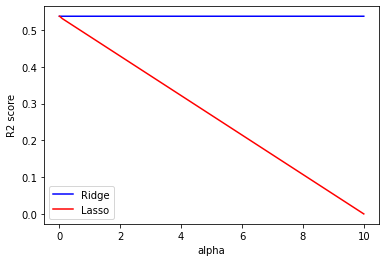

In [ ]:
### 문제 4-3 ###
## 그래프 작성 ##
plt.figure()
plt.plot(alpha, ridge_r2, label='ridge', color = 'blue')
plt.plot(alpha, lasso_r2, label='lasso', color = 'red')
plt.xlabel('alpha')
plt.ylabel('R2 score')
plt.legend(['Ridge', 'Lasso'])

- Rridge regression 모델 최적의 alpha 값: 0.0001
- Lasso regression 모델 최적의 alpha 값: 0.0001

In [ ]:
### 문제 4-3 ###
# 최종 결과 출력

#random_state가 위와 동일하므로 위와 같은 test data이다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 123) 

#최적의 파라미터를 이용한 Ridge 모델링
ridge = Ridge(alpha=optimal_alpha_ridge, random_state=123)
ridge.fit(X_train, y_train)

ridge_result = ridge.predict(X_test)
ridge_result_train = ridge.predict(X_train)

r2_score_ridge = r2_score(y_test, ridge_result)
r2_score_train_ridge = r2_score(y_train, ridge_result_train)


#최적의 파라미터를 이용한 Lasso 모델링
lasso = Lasso(alpha=optimal_alpha_lasso, random_state=123)
lasso.fit(X_train, y_train)

lasso_result = lasso.predict(X_test)
lasso_result_train = lasso.predict(X_train)

r2_score_lasso = r2_score(y_test, lasso_result)
r2_score_train_lasso = r2_score(y_train, lasso_result_train)

print("====train set에 대한 prediction 결과====")
print("Ridge: ")
print(r2_score_train_ridge)
print("Lasso: ")
print(r2_score_train_lasso)

print("====test set에 대한 prediction 결과====")
print("Ridge: ")
print(r2_score_ridge)
print("Lasso: ")
print(r2_score_lasso)

====train set에 대한 prediction 결과====
Ridge: 
0.5184810895788193
Lasso: 
0.518481083672055
====test set에 대한 prediction 결과====
Ridge: 
0.5219719241147514
Lasso: 
0.5219713510629771
